Bienvenidos al notebook para el proyecto individual #2.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carga de los datos en el dataframe df

df=pd.read_csv("../PI2_Accidentes/AccidentesAviones.csv")

In [3]:

#vista general de los datos, vemos que hay muchos signos "?"
df.head()


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5007 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  grou

In [5]:
#Cambiamos los datos "?" por None
for columna in df.columns:
    df[columna].replace({"?":None},inplace=True)

In [6]:
#revisamos nuestro dataframe nuevamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          3504 non-null   object
 2   Ruta                    5003 non-null   object
 3   OperadOR                4998 non-null   object
 4   flight_no               1326 non-null   object
 5   route                   4245 non-null   object
 6   ac_type                 4995 non-null   object
 7   registration            4736 non-null   object
 8   cn_ln                   4341 non-null   object
 9   all_aboard              4991 non-null   object
 10  PASAJEROS A BORDO       4787 non-null   object
 11  crew_aboard             4789 non-null   object
 12  cantidad de fallecidos  5000 non-null   object
 13  passenger_fatalities    4773 non-null   object
 14  crew_fatalities         4773 non-null   object
 15  grou

De los 5008 datos que tenia cada columna, la que se vió mas afectada fue "flight_no"

In [7]:
df.columns

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [8]:
#Ajustamos los nombres de las columnas
df.columns = ["fecha", "hora", "ruta", "operador", "no_vuelo", "tipo_vuelo",
       "ac_type", "registro", "cn_ln", "total_abordo", "pasajeros_abordo",
       "tripulacion_abordo", "total_fallecidos", "pasajeros_fallecidos",
       "tripulacion_fallecida", "ground", "resumen"]

In [9]:
#Pasamos nuestra fecha al formato adecuado
df["fecha"] = pd.to_datetime(df["fecha"])
#para la hora tenemos que darle formato quitando los caracteres no numericos y transformamos a hora
df["hora"] = df["hora"].str.replace("[^0-9]", "", regex=True)
df["hora"] = pd.to_datetime(df["hora"], format="%H%M", errors="coerce").dt.time

In [10]:
df.head(62)

,fecha,hora,ruta,operador,no_vuelo,tipo_vuelo,ac_type,registro,cn_ln,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,ground,resumen
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",None,None,Air show,Wright Byplane,SC1,None,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,None,Test flight,Dirigible,None,None,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,None,None,Curtiss seaplane,None,None,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,None,Zeppelin L-1 (airship),None,None,20,None,None,14,None,None,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1921-04-29,NaT,"Cleveland, Ohio",US Aerial Mail Service,None,None,De Havilland DH-4,196,None,1,0,1,1,0,1,0,"The aircraft crashed in a field, short of the ..."
58,1921-05-17,NaT,"Rock Springs, Wyoming",US Aerial Mail Service,None,None,De Havilland DH-4\rDe Havilland DH-4,176,None,1,0,1,1,0,1,0,Crashed while attempting to land.
59,1921-08-14,NaT,"Toulouse, France",Aeropostale,None,None,Breguet 14,F-ALBI,None,2,None,None,2,None,None,0,None
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,None,None,Royal Airship Works ZR-2 (airship),R-38,R-38,49,0,49,43,0,43,1,Crashed due to structural failure followed by ...


In [11]:
#reemplazará '\r' por una cadena vacía.
def reemplazar_r(celda):
    if isinstance(celda, str):
        return celda.replace('\r', '')
    else:
        return celda

In [12]:
# Aplica la función a todas las celdas del DataFrame.
df = df.applymap(reemplazar_r)

In [13]:
#Este head lo pedi con 62 filas por que havia una fila que tenia un "\r" en "ac_type" 
#que me movia todos los datos al cargarlo en el Power BI
df.head(62)

,fecha,hora,ruta,operador,no_vuelo,tipo_vuelo,ac_type,registro,cn_ln,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,ground,resumen
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",None,None,Air show,Wright Byplane,SC1,None,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,None,Test flight,Dirigible,None,None,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,None,None,Curtiss seaplane,None,None,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,None,Zeppelin L-1 (airship),None,None,20,None,None,14,None,None,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1921-04-29,NaT,"Cleveland, Ohio",US Aerial Mail Service,None,None,De Havilland DH-4,196,None,1,0,1,1,0,1,0,"The aircraft crashed in a field, short of the ..."
58,1921-05-17,NaT,"Rock Springs, Wyoming",US Aerial Mail Service,None,None,De Havilland DH-4De Havilland DH-4,176,None,1,0,1,1,0,1,0,Crashed while attempting to land.
59,1921-08-14,NaT,"Toulouse, France",Aeropostale,None,None,Breguet 14,F-ALBI,None,2,None,None,2,None,None,0,None
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,None,None,Royal Airship Works ZR-2 (airship),R-38,R-38,49,0,49,43,0,43,1,Crashed due to structural failure followed by ...


In [14]:
#Cambiamos el tipo de dato de nuestras columnas
df["operador"]=df["operador"].astype("category")
df["total_abordo"] = pd.to_numeric(df["total_abordo"], errors="coerce")
df["pasajeros_abordo"] = pd.to_numeric(df["pasajeros_abordo"], errors="coerce")
df["tripulacion_abordo"] = pd.to_numeric(df["tripulacion_abordo"], errors="coerce")
df["total_fallecidos"] = pd.to_numeric(df["total_fallecidos"], errors="coerce")
df["pasajeros_fallecidos"] = pd.to_numeric(df["pasajeros_fallecidos"], errors="coerce")
df["tripulacion_fallecida"] = pd.to_numeric(df["tripulacion_fallecida"], errors="coerce")

In [15]:
#Guardamos en nuestro archivo csv para usarlo para nuestro dashbaord
df.to_csv("../PI2_Accidentes/accidentes_bi.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  5008 non-null   datetime64[ns]
 1   hora                   3504 non-null   object        
 2   ruta                   5003 non-null   object        
 3   operador               4998 non-null   category      
 4   no_vuelo               1326 non-null   object        
 5   tipo_vuelo             4245 non-null   object        
 6   ac_type                4995 non-null   object        
 7   registro               4736 non-null   object        
 8   cn_ln                  4341 non-null   object        
 9   total_abordo           4991 non-null   float64       
 10  pasajeros_abordo       4787 non-null   float64       
 11  tripulacion_abordo     4789 non-null   float64       
 12  total_fallecidos       5000 non-null   float64       
 13  pas

In [25]:
#Con esta línea identificamos los duplicados, el resultado nos dice que no hay datos duplicados
df.duplicated().any()

False

No tenemos datos duplicados a tomar en cuenta en nuestro dataset, porlo que podemos proceder a revisar otros aspectos del comportamiento de los datos

In [18]:
df.describe(include="all")

,fecha,hora,ruta,operador,no_vuelo,tipo_vuelo,ac_type,registro,cn_ln,total_abordo,pasajeros_abordo,tripulacion_abordo,total_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,ground,resumen
count,5008,3504,5003,4998,1326,4245,4995,4736,4341,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964,4949
unique,NaN,1060,4124,2267,892,3837,2468,4700,3907,NaN,NaN,NaN,NaN,NaN,NaN,51,4857
top,NaN,15:00:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,49,1,NaN,NaN,NaN,NaN,NaN,NaN,0,Crashed under unknown circumstances.
freq,NaN,38,16,253,36,96,333,3,8,NaN,NaN,NaN,NaN,NaN,NaN,4716,9
mean,1971-05-14 09:57:13.226837072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,NaN,NaN
min,1908-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1951-05-07 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,NaN,NaN
50%,1970-09-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,NaN,NaN
75%,1992-03-22 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,NaN,NaN
max,2021-07-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,NaN,NaN


De las medidas de tendencia central obtenidas anteriormente podemos observar diferentes patrones que nos ofrecen los valores mas repetidos en la fila de "top" para el caso de columnas con valores categóricos, por ejemplo la ruta con más accidentes es en Moscow, el Operador que más accidentes ha tenido en bajo su supervisión es "Aeroflot" y se han registrado mas accidentes en cuando el vuelo es de tipo entrenamiento. En cuanto 

Text(0, 0.5, 'Fallecidos (Tripulación)')

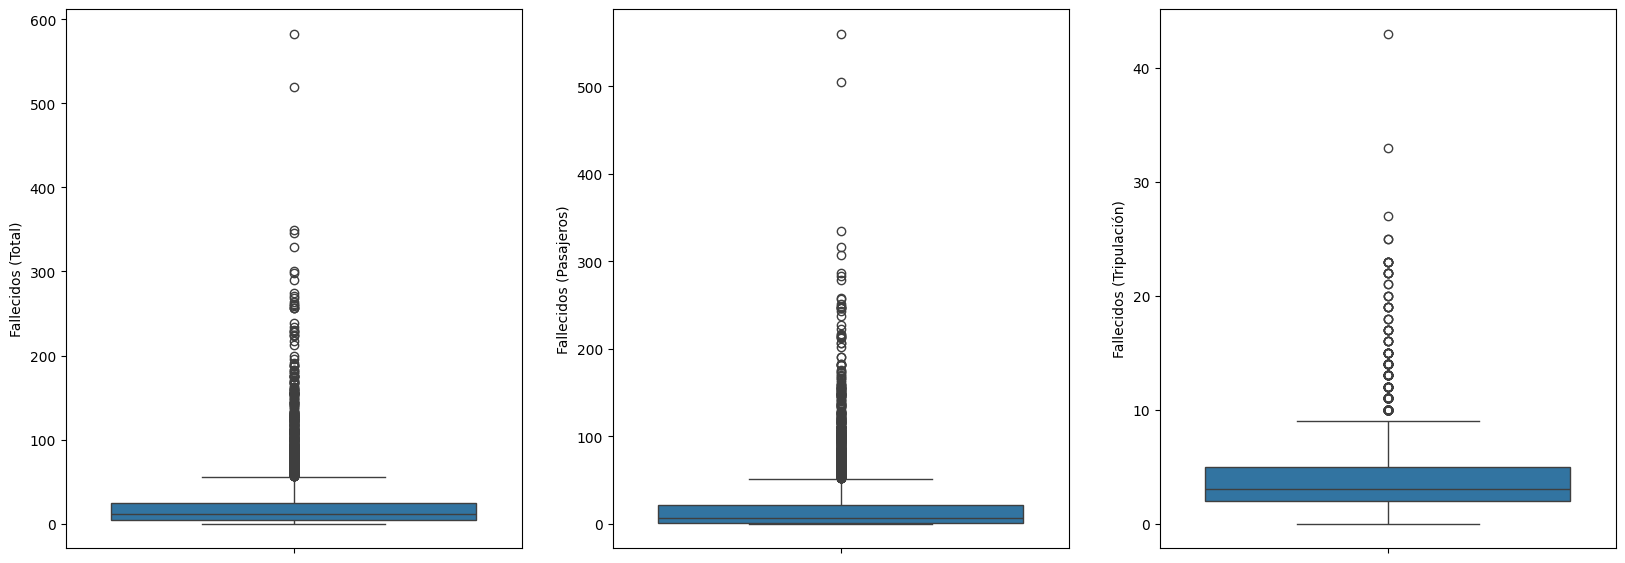

In [19]:
figura=plt.figure(figsize=(20,7))
ax1=figura.add_subplot(131)
ax2=figura.add_subplot(132)
ax3=figura.add_subplot(133)


sns.boxplot(data=df, y="total_fallecidos", ax=ax1)
ax1.set_ylabel("Fallecidos (Total)")
sns.boxplot(data=df, y="pasajeros_fallecidos", ax=ax2)
ax2.set_ylabel("Fallecidos (Pasajeros)")
sns.boxplot(data=df, y="tripulacion_fallecida", ax=ax3)
ax3.set_ylabel("Fallecidos (Tripulación)")

Con los anteriores boxplots podemos identidicar los outliers sobre la cantidad de gente que fallecio, de izquierda a derecha tenemos el total, pasajeros y tripulación que desafortunadamente fallecieron. Lo que resalta es que donde hubo más fallecimientos fue por parte de los pasajeros.

Text(0.5, 1.0, 'Frecuencia de Operadores (Top 10)')

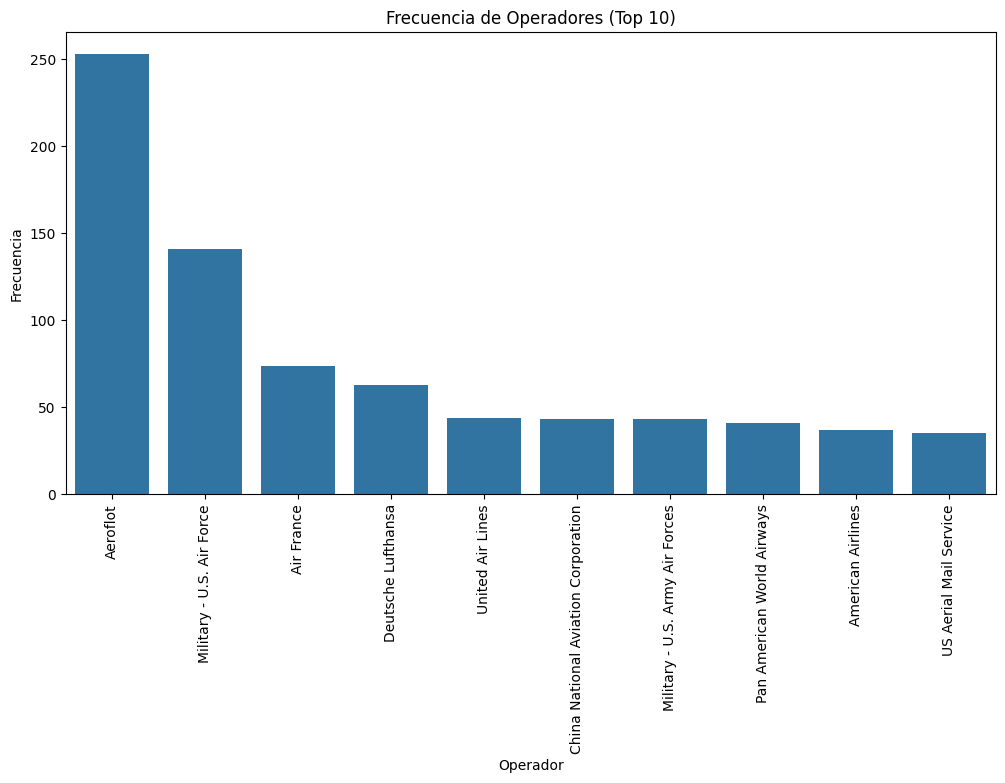

In [20]:
# Obtenmos los 10 operadores más frecuentes.
top_10_operadores = df["operador"].value_counts().nlargest(10).index
# hacemos un filtro que incluya los 10 operadores mas usados
df_top_10 = df[df["operador"].isin(top_10_operadores)]

# Creamos el gráfico de frecuencias.
plt.figure(figsize=(12, 6))  # Tamaño del gráfico (ancho x alto).
sns.countplot(data=df_top_10, x="operador", order=top_10_operadores)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad.

# Añadimos etiquetas y título al gráfico.
plt.xlabel("Operador")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Operadores (Top 10)")

Uno de los operadores que mas accidentes ha registrado, habra que revisar que tanto ha mejorado con el tiempo para ver si ha podido incrementar la eficiencia de sus vuelos para evitar accidentarse.

Text(0.5, 1.0, 'Histograma de Tipo de Vuelo (Top 10)')

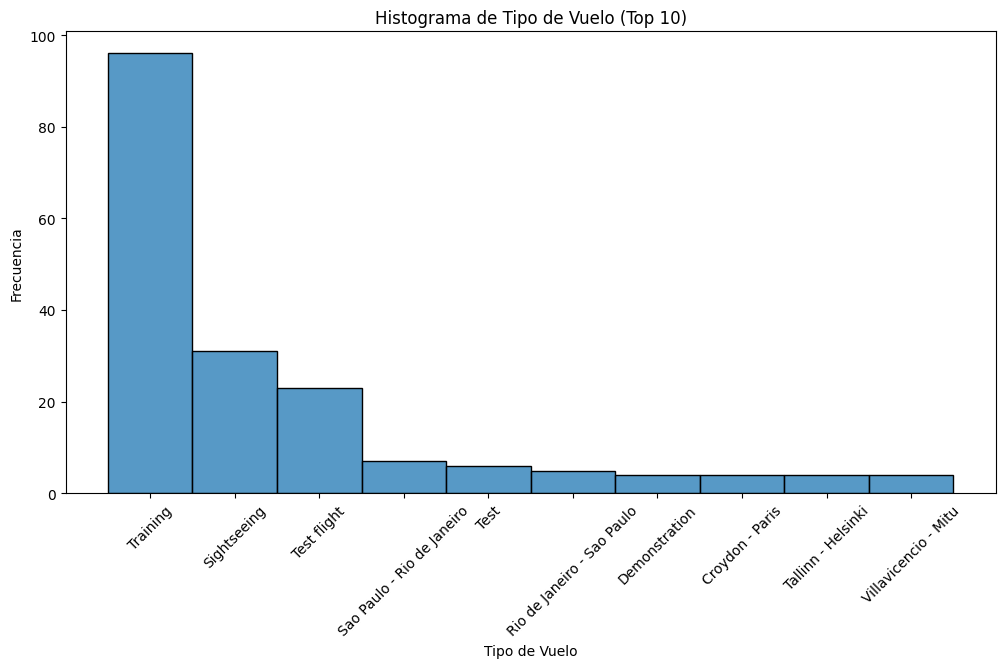

In [23]:
#agarramos un top 10 de los tipo de vuelo
top_10_tipo_vuelo = df["tipo_vuelo"].value_counts().nlargest(10).index

# Reorganiza el DataFrame df_top_10_tipo_vuelo según la frecuencia de mayor a menor
df_top_10_tipo_vuelo = df[df["tipo_vuelo"].isin(top_10_tipo_vuelo)]
df_top_10_tipo_vuelo = df_top_10_tipo_vuelo.sort_values(by="tipo_vuelo", key=lambda x: x.map(top_10_tipo_vuelo.get_loc))
 
plt.figure(figsize=(12, 6))  # Tamaño del gráfico (ancho x alto).
sns.histplot(data=df_top_10_tipo_vuelo, x="tipo_vuelo", bins=len(top_10_tipo_vuelo))
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad.

# Añade etiquetas y título al gráfico.
plt.xlabel("Tipo de Vuelo")
plt.ylabel("Frecuencia")
plt.title("Histograma de Tipo de Vuelo (Top 10)")

Este grafico de frecuencias nos indica que tipo de vuelo es el que tiene mas accidentes y en los entrenamientos es donde suceden más accidentes ¿Quien lo diría? siempre y cuando este controlado y exista una forma de que los pasajeros puedan escapar 